# Principal Component Analysis for Financial Inclusion

In [2]:
library(readr)
library(readxl)

In [57]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data inclusion financiera.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
#data$Consumo <- as.numeric(data$Consumo)
#data$Inversion <- as.numeric(data$Inversion)
head(data)

Fecha,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-03-31,10.28,7.78,12.14589,1286199,10.86663,7.716501,4.002207,24.79305,23.30518,977
2001-06-30,9.72,7.75,12.29734,1322741,10.28244,7.692056,4.214256,25.37873,23.44987,1016
2001-09-30,9.65,7.56,13.20549,1350085,10.04047,7.997109,4.075549,25.16044,22.11677,1021
2001-12-31,8.89,7.03,14.36475,1419039,10.08537,8.631039,4.339406,25.28203,21.63824,1050
2002-03-31,7.78,6.90,12.29137,1446002,10.31963,8.710091,4.414169,24.84977,21.51089,1044
2002-06-30,5.91,6.78,10.86410,1488120,10.42226,9.095588,4.649848,24.74132,21.39637,1054


In [17]:

log_diff_data <- log_diff_data[, !(colnames(log_diff_data) %in% c("Fecha"))]
data_normalized  <- data_normalized [, !(colnames(data_normalized ) %in% c("Fecha"))]

In [19]:
# Aplicar diferencias logarítmicas para estacionariedad (ejemplo con columnas numéricas)
numeric_data <- as.data.frame(lapply(data[, -1], as.numeric))
log_diff_data <- as.data.frame(log_diff_data)
log_diff_data <- cbind(Fecha = data$Fecha[-1], log_diff_data)

# Convertir data_normalized a data frame y agregar la columna de fechas al inicio
data_normalized <- as.data.frame(data_normalized)
data_normalized <- cbind(Fecha = data$Fecha[-1], data_normalized)

In [28]:
head(log_diff_data)
head(data_normalized)

,Fecha,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-06-30,-0.056014642,-0.003863495,0.01239265,0.02801474,-0.055259007,-0.003172873,0.05162725,0.023348072,0.006188953,0.039141976
2,2001-09-30,-0.007227703,-0.024821653,0.07124977,0.02046145,-0.023813241,0.038892031,-0.03346779,-0.008638376,-0.058528719,0.004909190
3,2001-12-31,-0.082030866,-0.072684484,0.08414400,0.04981233,0.004461587,0.076284827,0.06273211,0.004821019,-0.021874112,0.028007625
4,2002-03-31,-0.133370711,-0.018665294,-0.15587933,0.01882262,0.022962021,0.009117235,0.01708204,-0.017245387,-0.005902733,-0.005730675
5,2002-06-30,-0.274910507,-0.017544310,-0.12343389,0.02871107,0.009896391,0.043307312,0.05201510,-0.004373880,-0.005337907,0.009532961
6,2002-09-30,-0.073717576,-0.049896971,-0.18953356,0.02793323,0.040222083,0.036082482,-0.10798492,0.058905445,0.019089615,0.009442941


,Fecha,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-06-30,-0.40821863,0.11060817,0.2922155,0.40691575,-1.90853246,-0.43234106,0.6509684,0.1639990,-0.17397136,0.7872489
2,2001-09-30,0.07353981,-0.16258003,1.1061274,-0.01647729,-0.95337952,1.25005551,-0.3788099,-0.4258035,-1.38296577,-0.4383258
3,2001-12-31,-0.66512214,-0.78646884,1.2844366,1.62876086,-0.09454262,2.74558996,0.7853539,-0.1776238,-0.69821903,0.3886258
4,2002-03-31,-1.17208989,-0.08233230,-2.0347512,-0.10834049,0.46740088,0.05920493,0.2329193,-0.5845093,-0.39985682,-0.8192457
5,2002-06-30,-2.56975890,-0.06772034,-1.5860759,0.44594793,0.07053745,1.42664579,0.6556620,-0.3471699,-0.38930528,-0.2727893
6,2002-09-30,-0.58303055,-0.48943513,-2.5001422,0.40234647,0.99166858,1.13768688,-1.2805795,0.8196463,0.06702662,-0.2760121


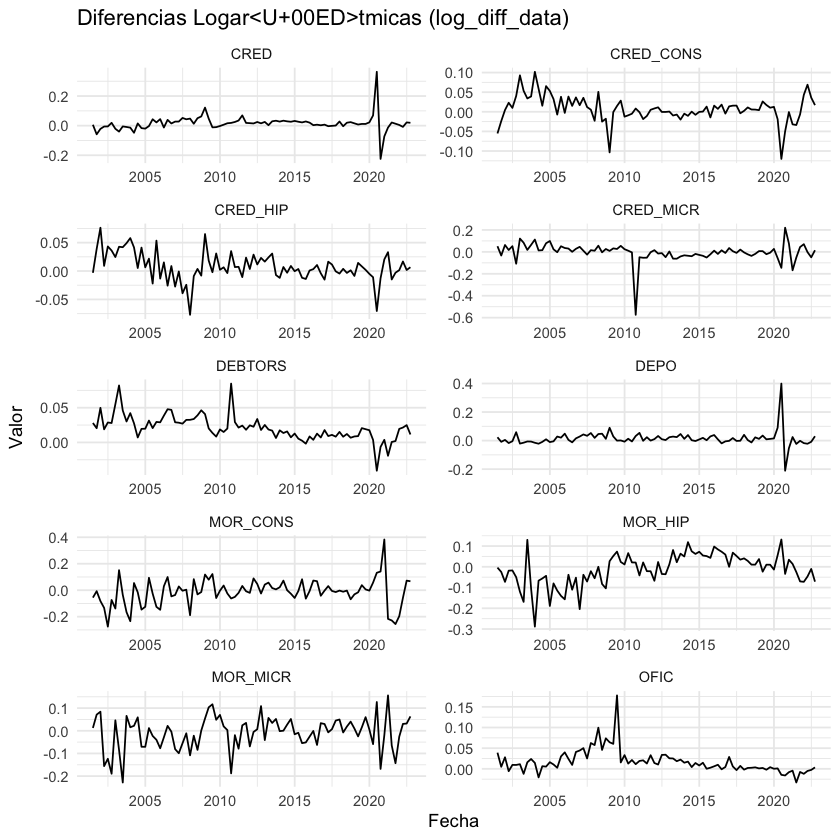

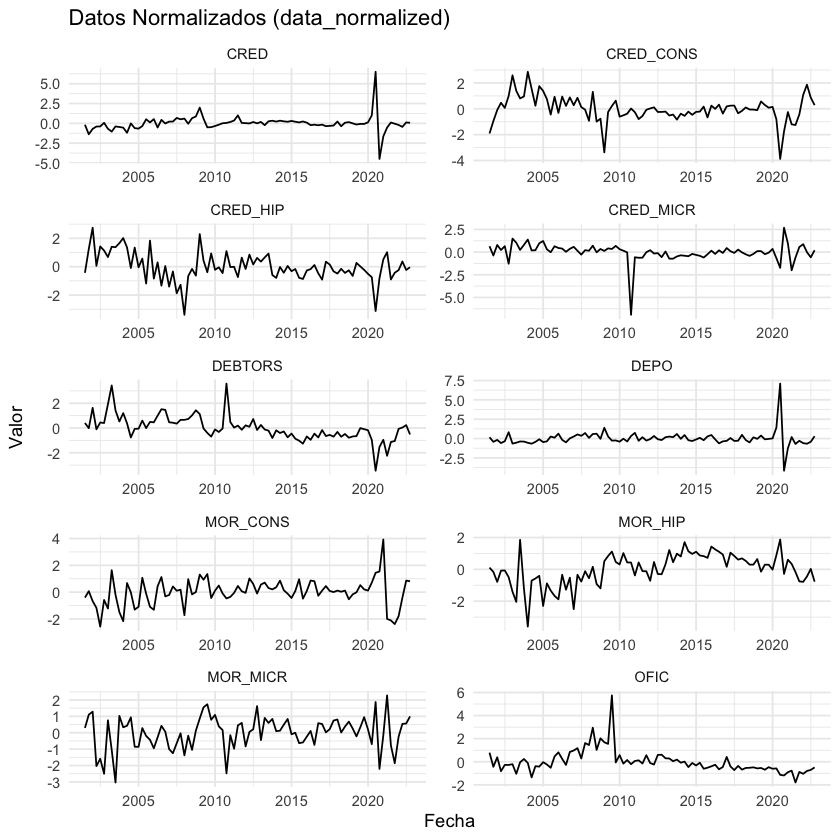

In [22]:
# Instalar ggplot2 si no está instalado
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
library(ggplot2)

# Pivotar los datos para graficar con ggplot2
library(tidyr)

log_diff_long <- log_diff_data %>%
  pivot_longer(-Fecha, names_to = "Variable", values_to = "Valor")

data_normalized_long <- data_normalized %>%
  pivot_longer(-Fecha, names_to = "Variable", values_to = "Valor")

# Gráfico para log_diff_data con paneles separados
p1 <- ggplot(log_diff_long, aes(x = Fecha, y = Valor)) +
  geom_line() +
  facet_wrap(~Variable, scales = "free", ncol = 2) +
  theme_minimal() +
  labs(title = "Diferencias Logarítmicas (log_diff_data)", x = "Fecha", y = "Valor")

# Gráfico para data_normalized con paneles separados
p2 <- ggplot(data_normalized_long, aes(x = Fecha, y = Valor)) +
  geom_line() +
  facet_wrap(~Variable, scales = "free", ncol = 2) +
  theme_minimal() +
  labs(title = "Datos Normalizados (data_normalized)", x = "Fecha", y = "Valor")

# Mostrar los gráficos
print(p1)
print(p2)


In [30]:
install.packages("psych") # Si no lo tienes instalado
library(psych)


  There is a binary version available but the source version is later:
      binary   source needs_compilation
psych 2.3.12 2.4.6.26             FALSE



installing the source package 'psych'



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [32]:
data_fin <- data_normalized[, -1]

In [49]:
# Aplicar PCA
pca_result <- principal(data_fin, nfactors = ncol(data_fin), rotate = "none")
print(pca_result$loadings)
head(pca_result$scores)


Loadings:
          PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9    PC10  
MOR_CONS   0.299 -0.387  0.509  0.344 -0.331  0.509               -0.104       
MOR_HIP    0.621 -0.455         0.422        -0.223  0.182  0.299  0.219       
MOR_MICR   0.357 -0.192  0.539         0.652         0.125 -0.299              
DEBTORS   -0.553  0.614  0.221  0.327 -0.207  0.112        -0.132  0.279       
CRED_CONS -0.739  0.158                0.173  0.263  0.536  0.201              
CRED_HIP  -0.522         0.136  0.539  0.504        -0.295  0.242              
CRED_MICR -0.459 -0.337  0.334 -0.622         0.139 -0.218  0.299  0.148       
DEPO       0.783  0.483                0.170  0.200         0.222        -0.159
CRED       0.800  0.501        -0.135  0.106  0.168         0.117         0.172
OFIC              0.350  0.756        -0.284 -0.423  0.104  0.102 -0.123       

                 PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10
SS loadings    3.193 1.519 1.301 

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0.3714538,0.01800475,0.5777020,-0.6232028,-0.5290357,-1.3582905,-1.858992348,-0.62964922,1.37152786,-2.1515840
-0.2843515,-0.78402199,0.2597271,0.9158871,1.0918009,-0.7153156,-1.373310387,-1.48714961,-0.59670264,-2.5984392
-1.1071190,0.60794465,1.2759419,0.8384668,1.9732047,-0.6632704,-2.153777854,-0.01904321,1.13430493,-1.4022718
-0.7400316,0.02891421,-1.7207175,-0.2422778,-0.7099792,-0.3703693,-0.146170772,1.22369507,-0.02138237,0.6679149
-1.0382881,0.66140412,-1.4240679,-0.1719780,0.4513181,-1.8640649,-1.339976953,1.96359000,0.97875785,-0.1034136
-0.5159827,1.41662506,-1.5406141,1.1624288,-0.5262098,0.2806733,-0.004252778,1.79730479,-2.55909660,-0.4560495


In [51]:
install.packages("reshape2")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmplNdkAB/downloaded_packages


In [56]:
# Extraer las cargas factoriales (variables en cada componente)
loadings <- pca_result$loadings

# Convertir las cargas factoriales a un data frame
loadings_df <- as.data.frame(loadings)

# Obtener los nombres de las variables (por ejemplo, los nombres de las columnas originales)
variable_names <- colnames(data_normalized)

# Crear una nueva columna con los nombres de las variables en la primera columna
loadings_df$Variable <- rep(variable_names, nrow(loadings_df))

# Reordenar para que la variable esté en la primera columna
loadings_df <- loadings_df[, c(ncol(loadings_df), 1:(ncol(loadings_df) - 1))]

# Visualizar la tabla
print(loadings_df)


ERROR: Error in as.data.frame.default(loadings): cannot coerce class '"loadings"' to a data.frame


Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.7868 1.2324 1.1404 1.0563 0.99514 0.81434 0.70298
Proportion of Variance 0.3193 0.1519 0.1301 0.1116 0.09903 0.06631 0.04942
Cumulative Proportion  0.3193 0.4712 0.6012 0.7128 0.81184 0.87815 0.92757
                           PC8     PC9    PC10
Standard deviation     0.67786 0.45337 0.24338
Proportion of Variance 0.04595 0.02055 0.00592
Cumulative Proportion  0.97352 0.99408 1.00000

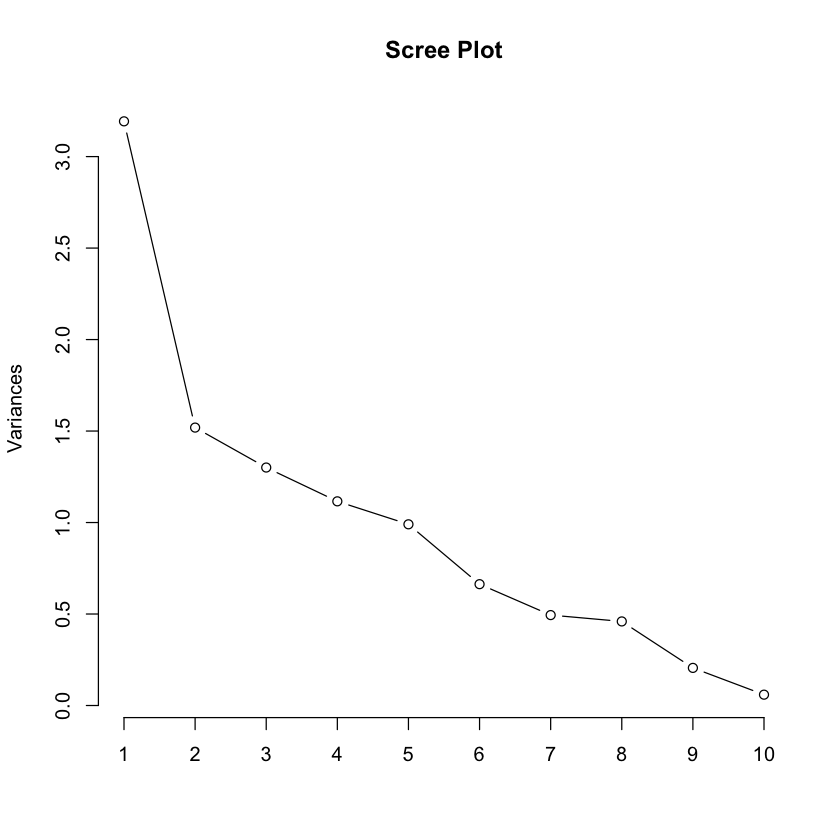

In [46]:
pca_result2 <- prcomp(data_fin, scale. = FALSE)
summary(pca_result2)
screeplot(pca_result2, type = "lines", main = "Scree Plot")